# TEMPORARY Notebook to visualise Array Coordinates
Written with the coord positions from Sarrvesh's github and references therein.

- LOW coords derived from "SKA1-LOW Configuration Coordinates - Complete Set (SKA-TEL-SKO-0000422 Revision 04)"
- MID Coords dervied from "SKA1-MID Physical Configuration Coordinates ( SKA-TEL-INSA-0000537 Revision 09)"


In [43]:
import numpy as np
import matplotlib.pyplot as plt
# from IPython.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib notebook

In [ ]:
def getAntennaOffset(this_dict, ave_x, ave_y):
    "Calculates antenna offset from array average position"
    this_dict["offset"] ={}
    dz_arr = []
    for ix in range(len(this_dict['station'])):
            dx = this_dict['arr_x'][ix] - ave_x
            dy = this_dict['arr_y'][ix] - ave_y

            dz = np.sqrt((dx*dx)+(dy*dy))
            dz_arr.append(dz)
    this_dict["offset"] = dz_arr
    return this_dict

In [2]:
"""LOAD ARRAY POSITIONS"""
data_location = 'AncillData'
mid_positions = np.genfromtxt(data_location + '/mid_array_coords.dat', 
                              names = ['arr_x','arr_y','arr_z','diam','station'], 
                              dtype = 'f8,f8,f8,f8,U6')


### Plot array

<IPython.core.display.Javascript object>


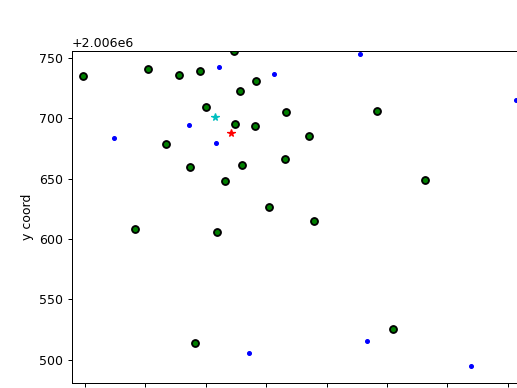

Average SKA_Mid position (all antennas) =  5109271.366196692 2006687.3689716842 -3239042.17785115
Average SKA_Mid position (core antennas within 1000.0m): x = 5109258.108828629m, y = 2006700.7657708493m, z = -3239135.594182808m


Text(0, 0.5, 'y coord')

In [95]:
fig_arr = plt.figure(1)
ax_arr = fig_arr.add_subplot(111)
ax_arr.axis('equal')

#--- Separate MK & SKA dishes 
ska_dishes = {}
mk_dishes = {}
names = ['arr_x','arr_y','arr_z','diam','station']

for name in names:
    ska_dishes[name] = [mid_positions[name][x] for x in range(len(mid_positions['station'])) if mid_positions['station'][x].startswith('SKA')]
    mk_dishes[name] = [mid_positions[name][x] for x in range(len(mid_positions['station'])) if mid_positions['station'][x].startswith('M')]

#--- Plot MK and SKA dishes
ax_arr.plot(ska_dishes['arr_x'],ska_dishes['arr_y'],'g.',label='SKA') #--- SKA positions
ax_arr.plot(mk_dishes['arr_x'],mk_dishes['arr_y'],'b.',label='MK') #--- MK positions

#--- Average position from whole array, SKA dishes only
ska_ave_arr_x = np.average(ska_dishes['arr_x'])
ska_ave_arr_y = np.average(ska_dishes['arr_y'])
ska_ave_arr_z = np.average(ska_dishes['arr_z'])
ax_arr.plot(ska_ave_arr_x, ska_ave_arr_y,'r*') 

print("Average SKA_Mid position (all antennas) = ", ska_ave_arr_x, ska_ave_arr_y,ska_ave_arr_z)

#--- Add in the offsets from array centre
getAntennaOffset(ska_dishes, ska_ave_arr_x, ska_ave_arr_y)

#--- Just the Core
max_range = 1000.0
ska_core_dishes = {}
names = ['arr_x','arr_y','arr_z','diam','station','offset']
for name in names:
    ska_core_dishes[name] = [ska_dishes[name][x] for x in range(len(ska_dishes['station'])) if ska_dishes['offset'][x] < max_range]

    
ax_arr.plot(ska_core_dishes['arr_x'],ska_core_dishes['arr_y'],'ko',label='SKA',zorder=0)

#--- Average position from whole array, SKA dishes only
ska_core_ave_arr_x = np.average(ska_core_dishes['arr_x'])
ska_core_ave_arr_y = np.average(ska_core_dishes['arr_y'])
ska_core_ave_arr_z = np.average(ska_core_dishes['arr_z'])
ax_arr.plot(ska_core_ave_arr_x, ska_core_ave_arr_y,'c*') 

print("Average SKA_Mid position (core antennas within "+str(max_range)+"m): x = "+str(ska_core_ave_arr_x)+"m, y = "+str(ska_core_ave_arr_y)+"m, z = "+str(ska_core_ave_arr_z)+"m")

ax_arr.set_xlim(ska_ave_arr_x-2000.0,ska_ave_arr_x+2000.0)
ax_arr.set_ylim(ska_ave_arr_y-2000.0,ska_ave_arr_y+2000.0)
ax_arr.set_xlabel('X coord')
ax_arr.set_ylabel('y coord')
